In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%run ../scripts/execute_query.ipynb

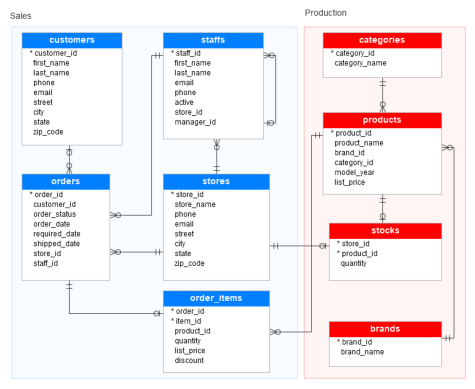

In [3]:
%run ../notebooks/schema.ipynb

#### Which brand has the most products in the store?

In [6]:
query="""
SELECT b.brand_name,
COUNT(p.product_id) AS product_count
FROM brands b
LEFT JOIN products p
USING (brand_id)
GROUP BY b.brand_id
ORDER BY product_count DESC;
"""
df=execute_query(query)
df

,brand_name,product_count
0,Trek,135
1,Electra,118
2,Surly,25
3,Sun Bicycles,23
4,Haro,10
5,Strider,3
6,Pure Cycles,3
7,Heller,3
8,Ritchey,1


Text(0.5, 1.0, 'Product Count per Brand')

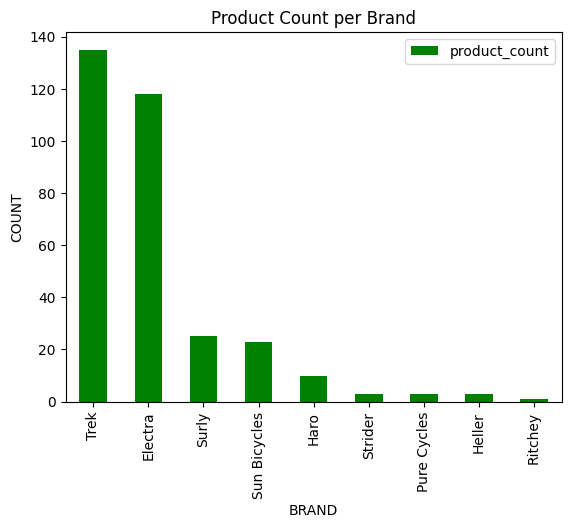

In [7]:
df.plot(kind='bar',x='brand_name' ,y='product_count',legend='False',color='green')
plt.xlabel('BRAND')
plt.ylabel('COUNT')
plt.title("Product Count per Brand")

##### Which product is the most ordered?

In [8]:
query="""
SELECT product_id,product_name,
SUM(quantity) as product_count_in_orders
FROM orders 
JOIN order_items 
USING(order_id)
JOIN products
USING (product_id)
GROUP BY product_id
ORDER BY product_count_in_orders DESC
LIMIT 1
"""
execute_query(query)

,product_id,product_name,product_count_in_orders
0,6,Surly Ice Cream Truck Frameset - 2016,167


##### Which product had the maximum revenue?

In [25]:
query="""
SELECT product_id,product_name,
    SUM(oi.quantity*(oi.list_price-oi.list_price*oi.discount)) as total_sale_price
FROM products p
JOIN order_items oi
USING (product_id)
group by product_id
order by total_sale_price DESC
LIMIT 1
"""
execute_query(query)

,product_id,product_name,total_sale_price
0,7,Trek Slash 8 27.5 - 2016,555558.6111


##### What is total unit sold for each category?

In [37]:
query="""
SELECT  category_id,
        category_name,
        SUM(quantity) as total_quantity_sold
FROM products p
JOIN categories c
USING (category_id)
JOIN order_items oi
USING (product_id)
GROUP BY category_id
ORDER by total_quantity_sold DESC
"""
execute_query(query)

,category_id,category_name,total_quantity_sold
0,3,Cruisers Bicycles,2063
1,6,Mountain Bikes,1755
2,1,Children Bicycles,1179
3,2,Comfort Bicycles,813
4,7,Road Bikes,559
5,4,Cyclocross Bicycles,394
6,5,Electric Bikes,315


<Axes: xlabel='category_name'>

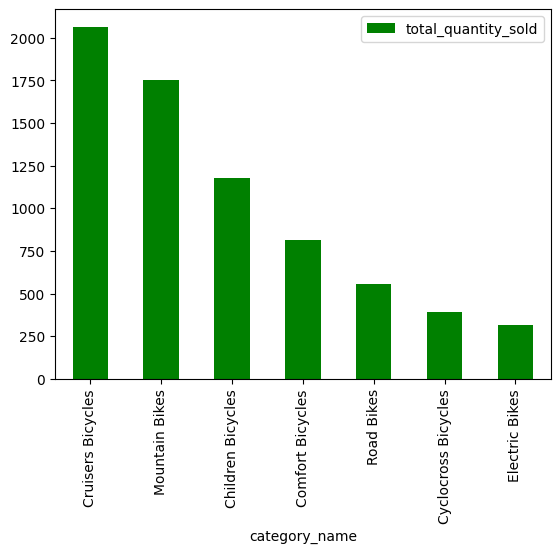

In [42]:
df=execute_query(query)

df.plot(kind='bar',x='category_name',y='total_quantity_sold',legend='False',color='green')

##### Which product is sold out in each store?

In [23]:
query="""
SELECT store_name,product_id,product_name
FROM stores
JOIN stocks
USING (store_id)
JOIN products
USING (product_id)
WHERE quantity =0

"""

execute_query(query)

,store_name,product_id,product_name
0,Santa Cruz Bikes,6,Surly Ice Cream Truck Frameset - 2016
1,Santa Cruz Bikes,8,Trek Remedy 29 Carbon Frameset - 2016
2,Santa Cruz Bikes,32,Trek Farley Alloy Frameset - 2017
3,Santa Cruz Bikes,42,Trek Fuel EX 5 27.5 Plus - 2017
4,Santa Cruz Bikes,92,Haro Shredder 20 - 2017
5,Santa Cruz Bikes,160,Trek Emonda SLR 6 - 2018
6,Santa Cruz Bikes,163,Surly Pack Rat - 2018
7,Santa Cruz Bikes,168,Surly Straggler - 2018
8,Santa Cruz Bikes,246,Electra Townie Original 3i EQ Ladies' - 2018
9,Santa Cruz Bikes,302,Electra Townie Original 1 - 2018


##### Calculate the average bike price for each model year

In [35]:
query="""
SELECT model_year AS 'Model Year',ROUND(AVG(list_price),2) AS 'Average Price'
FROM products
GROUP BY model_year
ORDER BY 'Average Price' DESC
"""

execute_query(query)

,Model Year,Average Price
0,2019,2583.32
1,2018,1658.47
2,2017,1279.93
3,2016,980.30


<Axes: xlabel='Model Year'>

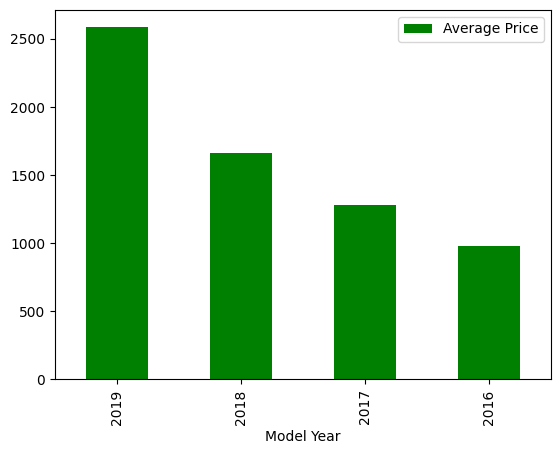

In [37]:
df=execute_query(query)

df.plot(kind='bar',x='Model Year',y='Average Price',legend='False',color='green')

##### How many staffs are active in all stores?

In [45]:
query="""
SELECT COUNT(*) as active_staffs_count
FROM staffs
WHERE active=1

"""

execute_query(query)

,active_staffs_count
0,10


##### What is the name of top manager?

In [49]:
query="""
SELECT CONCAT(first_name,' ',last_name) as top_manager_name
FROM staffs
WHERE manager_id IS NULL
"""

execute_query(query)

,top_manager_name
0,Fabiola Jackson


##### Which state has the most customers?

In [14]:
query="""
SELECT state ,COUNT(customer_id) AS 'Number of Customer'
FROM customers
GROUP BY state
ORDER BY COUNT(customer_id) DESC
"""

execute_query(query)

,state,Number of Customer
0,NY,1019
1,CA,284
2,TX,142


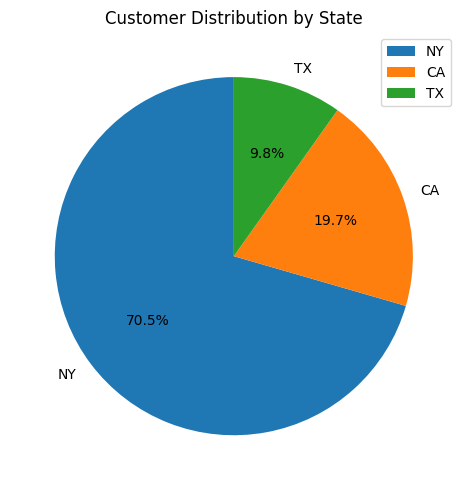

In [19]:
df=execute_query(query)

df.set_index('state', inplace=True)

ax = df.plot(
    kind='pie',
    y='Number of Customer',
    autopct='%1.1f%%',
    legend=True,
    figsize=(5, 5),
    startangle=90
)


plt.ylabel('')  
plt.title('Customer Distribution by State')
plt.tight_layout()
plt.show()

##### Which customers have made the highest number of orders?

In [31]:
query="""
SELECT customer_id,CONCAT(first_name,' ',last_name) as customer_name,
    COUNT(DISTINCT order_id) as total_orders 
FROM customers
JOIN orders
USING (customer_id)
JOIN order_items
USING (order_id)
GROUP BY customer_id
ORDER BY total_orders DESC
LIMIT 10
"""
execute_query(query)

,customer_id,customer_name,total_orders
0,116,Merlene Vinson,3
1,77,Keri Bridges,3
2,68,Jayne Kirkland,3
3,66,Lorrie Becker,3
4,64,Bobbie Foster,3
5,61,Elinore Aguilar,3
6,56,Lolita Mosley,3
7,53,Saturnina Garner,3
8,50,Cleotilde Booth,3
9,47,Bridgette Guerra,3


##### in which month and which year the most orders have been made?

In [44]:
query="""
SELECT  STRFTIME('%Y',order_date) AS year,
        CASE strftime('%m', order_date)
        WHEN '01' THEN 'January'
        WHEN '02' THEN 'February'
        WHEN '03' THEN 'March'
        WHEN '04' THEN 'April'
        WHEN '05' THEN 'May'
        WHEN '06' THEN 'June'
        WHEN '07' THEN 'July'
        WHEN '08' THEN 'August'
        WHEN '09' THEN 'September'
        WHEN '10' THEN 'October'
        WHEN '11' THEN 'November'
        WHEN '12' THEN 'December'
        END AS month,
        COUNT(DISTINCT order_id) as order_count
FROM orders
GROUP BY year,month
ORDER BY order_count DESC
"""
execute_query(query)

,year,month,order_count
0,2018,April,125
1,2018,March,68
2,2016,September,67
3,2017,March,67
4,2017,August,65
5,2017,October,65
6,2016,October,64
7,2016,August,63
8,2017,June,63
9,2017,April,57


##### How many orders were shipped late?

In [65]:
query="""
SELECT COUNT(order_id) as shippment_with_delay_count
FROM orders
WHERE shipped_date>=required_date
        AND shipped_date IS NOT NULL
        AND required_date IS NOT NULL
"""
execute_query(query)

,shippment_with_delay_count
0,963


##### Which stores have shipped orders late more frequently?

In [71]:
query="""
SELECT COUNT(order_id) shippment_with_delay_count
FROM orders
WHERE shipped_date>=required_date
        AND shipped_date IS NOT NULL
        AND required_date IS NOT NULL
GROUP BY store_id
ORDER BY shippment_with_delay_count DESC
"""
execute_query(query)

,shippment_with_delay_count
0,688
1,192
2,83


##### which brands have made more revenue?

In [34]:
query="""
SELECT brand_name ,
        ROUND(SUM(oi.quantity*oi.list_price*(1-oi.discount)/1000),2) as total_revenue_thousand
FROM order_items AS oi
JOIN products AS p
USING (product_id)
JOIN brands AS b
USING (brand_id)
GROUP BY brand_name
ORDER BY total_revenue_thousand DESC
"""
execute_query(query)

,brand_name,total_revenue_thousand
0,Trek,4602.75
1,Electra,1205.32
2,Surly,949.51
3,Sun Bicycles,341.99
4,Haro,185.38
5,Heller,171.46
6,Pure Cycles,149.48
7,Ritchey,78.90
8,Strider,4.32


<Axes: xlabel='brand_name'>

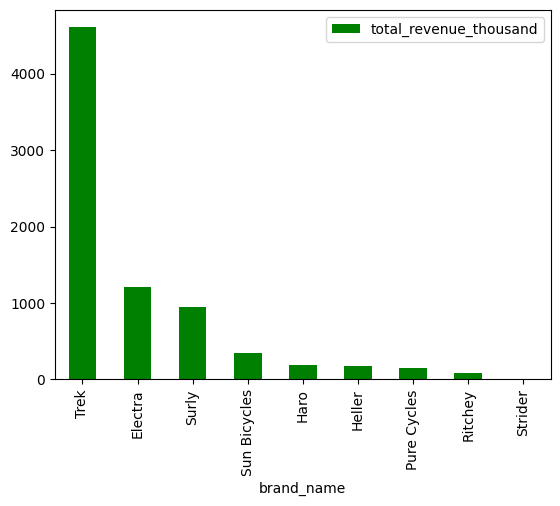

In [35]:
df=execute_query(query)

df.plot(kind='bar',x='brand_name',y='total_revenue_thousand',legend='False',color='green')

##### Which employees have earned more revenue? which have no revenue?

In [44]:
query="""
SELECT staff_id,
        CONCAT(first_name,' ',last_name) employee_name,
            ROUND(SUM(oi.quantity*oi.list_price*(1-oi.discount)/1000),2) as total_revenue_thousand
FROM staffs AS s
LEFT JOIN orders AS o
USING (staff_id)
LEFT JOIN order_items AS oi
USING (order_id)
GROUP BY staff_id
ORDER BY total_revenue_thousand DESC

"""

execute_query(query)

,staff_id,employee_name,total_revenue_thousand
0,6,Marcelene Boyer,2624.12
1,7,Venita Daniel,2591.63
2,3,Genna Serrano,853.29
3,2,Mireya Copeland,752.54
4,8,Kali Vargas,463.92
5,9,Layla Terrell,403.62
6,10,Bernardine Houston,NaN
7,5,Jannette David,NaN
8,4,Virgie Wiggins,NaN
9,1,Fabiola Jackson,NaN


<Axes: xlabel='employee_name'>

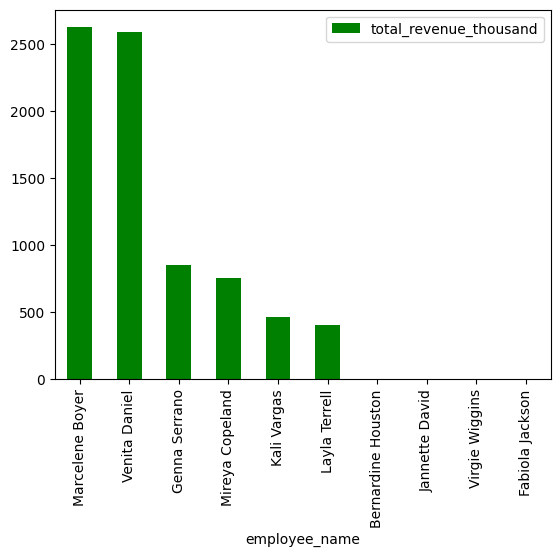

In [45]:
df=execute_query(query)

df.plot(kind='bar',x='employee_name',y='total_revenue_thousand',legend='False',color='green')

##### Which stores have earned more revenue?

In [53]:
query="""
SELECT store_name, 
        ROUND(SUM(oi.quantity*oi.list_price*(1-oi.discount)/1000),2) as total_revenue_thousand
FROM stores AS s
LEFT JOIN orders AS o
USING(store_id)
LEFT JOIN order_items oi
USING (order_id)
GROUP BY store_id
ORDER BY total_revenue_thousand DESC
"""

execute_query(query)

,store_name,total_revenue_thousand
0,Baldwin Bikes,5215.75
1,Santa Cruz Bikes,1605.82
2,Rowlett Bikes,867.54


##### What stores do we have to focus on currently concerning our stock?

In [12]:
query="""
SELECT store_id,store_name,product_id,product_name
FROM stores
LEFT JOIN stocks
USING (store_id)
LEFT JOIN products
USING (product_id)
where quantity=0
"""
execute_query(query)

,store_id,store_name,product_id,product_name
0,1,Santa Cruz Bikes,6,Surly Ice Cream Truck Frameset - 2016
1,1,Santa Cruz Bikes,8,Trek Remedy 29 Carbon Frameset - 2016
2,1,Santa Cruz Bikes,32,Trek Farley Alloy Frameset - 2017
3,1,Santa Cruz Bikes,42,Trek Fuel EX 5 27.5 Plus - 2017
4,1,Santa Cruz Bikes,92,Haro Shredder 20 - 2017
5,1,Santa Cruz Bikes,160,Trek Emonda SLR 6 - 2018
6,1,Santa Cruz Bikes,163,Surly Pack Rat - 2018
7,1,Santa Cruz Bikes,168,Surly Straggler - 2018
8,1,Santa Cruz Bikes,246,Electra Townie Original 3i EQ Ladies' - 2018
9,1,Santa Cruz Bikes,302,Electra Townie Original 1 - 2018


##### How many products are out of stock in each store?

In [16]:
query="""
SELECT store_id,store_name,COUNT(product_id) as products_out_of_stock_count
FROM stores
LEFT JOIN stocks
USING (store_id)
LEFT JOIN products
USING (product_id)
where quantity=0
GROUP BY store_id
"""
execute_query(query)

,store_id,store_name,products_out_of_stock_count
0,1,Santa Cruz Bikes,10
1,2,Baldwin Bikes,10
2,3,Rowlett Bikes,5


##### When should we run sales or launch new products? What are our peak seasons?

In [28]:
query="""
SELECT strftime('%m', order_date) AS month,
        strftime('%Y', order_date) AS year,
        ROUND(SUM(oi.quantity*oi.list_price*(1-oi.discount)/1000),2) as total_revenue_thousand,
        SUM(oi.quantity) as sold_item_count
FROM orders o
LEFT JOIN order_items oi
USING (order_id)
GROUP BY month
ORDER BY total_revenue_thousand DESC,sold_item_count DESC
"""
execute_query(query)

,month,year,total_revenue_thousand,sold_item_count
0,04,2016,1212.36,1004
1,01,2016,882.19,691
2,03,2016,853.50,799
3,02,2016,669.69,646
4,06,2016,589.62,496
5,09,2016,575.46,522
6,10,2016,526.19,558
7,08,2016,524.59,547
8,11,2016,475.27,430
9,05,2016,473.50,465


##### Are we experiencing year-over-year growth? 

In [13]:
# Based on revenue
query="""
SELECT strftime('%Y', order_date) AS year,
        ROUND(SUM(oi.quantity*oi.list_price*(1-oi.discount)/1000),2) as total_revenue_thousand
FROM orders o
JOIN order_items oi
USING (order_id)
GROUP BY year
"""
df=execute_query(query)
df

,year,total_revenue_thousand
0,2016,2427.38
1,2017,3447.21
2,2018,1814.53


<Axes: xlabel='year'>

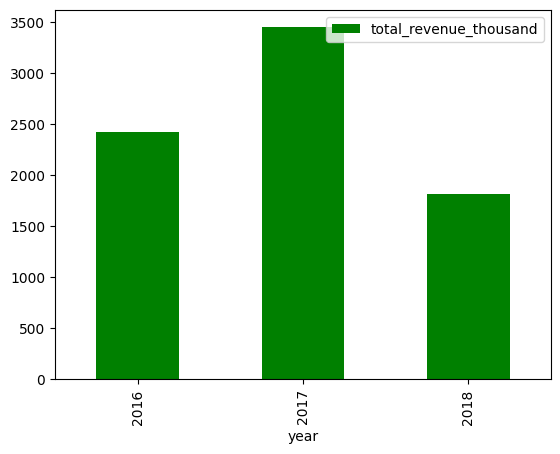

In [14]:
df.plot(kind='bar',x='year',y='total_revenue_thousand',legend='False',color='green')

In [8]:
# Based on number of orders 
query="""
SELECT STRFTIME('%Y',order_date) AS year,
        COUNT(order_id) number_of_orders
FROM orders
GROUP BY year
"""
df=execute_query(query)
df

,year,number_of_orders
0,2016,635
1,2017,688
2,2018,292


<Axes: xlabel='year'>

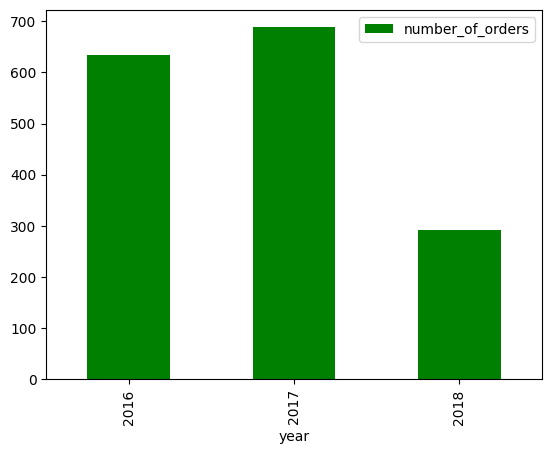

In [9]:
df.plot(kind='bar',x='year',y='number_of_orders',legend='False',color='green')

##### Identify the top 10 customers based on total spending or revenue contribution?

In [37]:
query="""
SELECT  customer_id,
        CONCAT(first_name,' ',last_name) AS name,
        ROUND(SUM(oi.quantity*oi.list_price*(1-oi.discount)),0) as total_revenue
FROM customers c
JOIN orders o
USING (customer_id)
JOIN order_items oi
USING (order_id)
GROUP BY customer_id
ORDER BY total_revenue DESC
LIMIT 10
"""
execute_query(query)

,customer_id,name,total_revenue
0,94,Sharyn Hopkins,34808.0
1,10,Pamelia Newman,33634.0
2,75,Abby Gamble,32803.0
3,6,Lyndsey Bean,32675.0
4,16,Emmitt Sanchez,31926.0
5,73,Melanie Hayes,31914.0
6,1,Debra Burks,27888.0
7,61,Elinore Aguilar,25636.0
8,93,Corrina Sawyer,25613.0
9,122,Shena Carter,24891.0
